<a href="https://colab.research.google.com/github/deburg0/DLwPython/blob/main/chapter02_mathematical-building-blocks.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

This is a companion notebook for the book [Deep Learning with Python, Third Edition](https://www.manning.com/books/deep-learning-with-python-third-edition). For readability, it only contains runnable code blocks and section titles, and omits everything else in the book: text paragraphs, figures, and pseudocode.

**If you want to be able to follow what's going on, I recommend reading the notebook side by side with your copy of the book.**

The book's contents are available online at [deeplearningwithpython.io](https://deeplearningwithpython.io).

In [ ]:
!pip install keras keras-hub --upgrade -q

In [1]:
import os
os.environ["KERAS_BACKEND"] = "tensorflow"

In [2]:
# @title
import os
from IPython.core.magic import register_cell_magic

@register_cell_magic
def backend(line, cell):
    current, required = os.environ.get("KERAS_BACKEND", ""), line.split()[-1]
    if current == required:
        get_ipython().run_cell(cell)
    else:
        print(
            f"This cell requires the {required} backend. To run it, change KERAS_BACKEND to "
            f"\"{required}\" at the top of the notebook, restart the runtime, and rerun the notebook."
        )

## The mathematical building blocks of neural networks

### A first look at a neural network

In [3]:
from keras.datasets import mnist

(train_images, train_labels), (test_images, test_labels) = mnist.load_data()

11490434/11490434 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step


In [4]:
train_images.shape

(60000, 28, 28)

In [5]:
len(train_labels)

60000

In [6]:
train_labels

array([5, 0, 4, ..., 5, 6, 8], dtype=uint8)

In [7]:
test_images.shape

(10000, 28, 28)

In [8]:
len(test_labels)

10000

In [9]:
test_labels

array([7, 2, 1, ..., 4, 5, 6], dtype=uint8)

In [10]:
import keras
from keras import layers

model = keras.Sequential(
    [
        layers.Dense(512, activation="relu"),
        layers.Dense(10, activation="softmax"),
    ]
)

In [11]:
model.compile(
    optimizer="adam",
    loss="sparse_categorical_crossentropy",
    metrics=["accuracy"],
)

In [12]:
train_images = train_images.reshape((60000, 28 * 28))
train_images = train_images.astype("float32") / 255
test_images = test_images.reshape((10000, 28 * 28))
test_images = test_images.astype("float32") / 255

In [13]:
model.fit(train_images, train_labels, epochs=5, batch_size=128)

Epoch 1/5
469/469 ━━━━━━━━━━━━━━━━━━━━ 4s 4ms/step - accuracy: 0.8758 - loss: 0.4513
Epoch 2/5
469/469 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.9670 - loss: 0.1147
Epoch 3/5
469/469 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.9792 - loss: 0.0728
Epoch 4/5
469/469 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.9857 - loss: 0.0488
Epoch 5/5
469/469 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.9902 - loss: 0.0369


In [14]:
test_digits = test_images[0:10]
predictions = model.predict(test_digits)
predictions[0]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 302ms/step


array([9.5943290e-07, 4.3119236e-08, 5.4916422e-06, 2.8908442e-04,
       7.5116829e-10, 7.7155065e-08, 4.4954842e-11, 9.9967247e-01,
       2.8822826e-06, 2.8985780e-05], dtype=float32)

In [15]:
predictions[0].argmax()

np.int64(7)

In [16]:
predictions[0][7]

np.float32(0.9996725)

In [18]:
print(test_labels[0])

7


In [21]:
test_loss, test_acc = model.evaluate(test_images, test_labels)
print(f"test_acc: {test_acc:.3f}")

313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.9718 - loss: 0.0898
test_acc: 0.977


In [22]:
print(f"test_loss: {test_loss}")

test_loss: 0.07514221221208572


### Data representations for neural networks

#### Scalars (rank-0 tensors)

In [23]:
import numpy as np
x = np.array(12)
x

array(12)

In [24]:
x.ndim

0

#### Vectors (rank-1 tensors)

In [25]:
x = np.array([12, 3, 6, 14, 7])
x

array([12,  3,  6, 14,  7])

In [26]:
x.ndim

1

#### Matrices (rank-2 tensors)

In [27]:
x = np.array([[5, 78, 2, 34, 0],
              [6, 79, 3, 35, 1],
              [7, 80, 4, 36, 2]])
x.ndim

2

#### Rank-3 tensors and higher-rank tensors

In [28]:
x = np.array([[[5, 78, 2, 34, 0],
               [6, 79, 3, 35, 1],
               [7, 80, 4, 36, 2]],
              [[5, 78, 2, 34, 0],
               [6, 79, 3, 35, 1],
               [7, 80, 4, 36, 2]],
              [[5, 78, 2, 34, 0],
               [6, 79, 3, 35, 1],
               [7, 80, 4, 36, 2]]])
x.ndim

3

#### Key attributes

In [29]:
from keras.datasets import mnist

(train_images, train_labels), (test_images, test_labels) = mnist.load_data()

In [30]:
train_images.ndim

3

In [31]:
train_images.shape

(60000, 28, 28)

In [32]:
train_images.dtype

dtype('uint8')

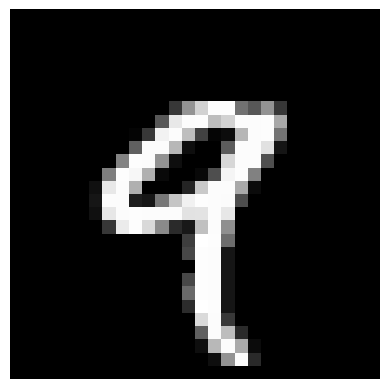

In [34]:
import matplotlib.pyplot as plt

digit = train_images[4]
plt.imshow(digit, cmap=plt.cm.binary_r)
plt.axis("off")
plt.show()

In [35]:
train_labels[4]

np.uint8(9)

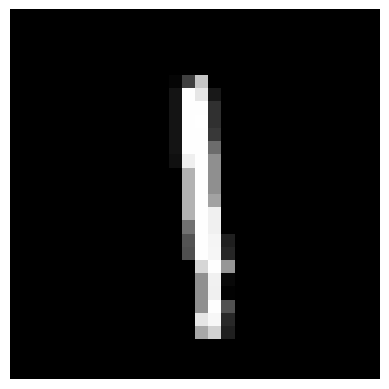

In [36]:
digit = train_images[8]
plt.imshow(digit, cmap=plt.cm.binary_r)
plt.axis("off")
plt.show()

In [38]:
print(train_labels[8])

1


#### Manipulating tensors in NumPy

In [39]:
my_slice = train_images[10:100]
my_slice.shape

(90, 28, 28)

In [40]:
my_slice = train_images[10:100, :, :]
my_slice.shape

(90, 28, 28)

In [41]:
my_slice = train_images[10:100, 0:28, 0:28]
my_slice.shape

(90, 28, 28)

In [42]:
my_slice = train_images[:, 14:, 14:]
my_slice.shape

(60000, 14, 14)

In [43]:
my_slice = train_images[:, 7:-7, 7:-7]
my_slice.shape

(60000, 14, 14)

#### The notion of data batches

In [44]:
# first batch
batch = train_images[:128]

In [45]:
# second batch
batch = train_images[128:256]

In [46]:
# nth batch
n = 3
batch = train_images[128 * n : 128 * (n + 1)]

#### Real-world examples of data tensors

##### Vector data

##### Timeseries data or sequence data

##### Image data

##### Video data

### The gears of neural networks: Tensor operations

#### Element-wise operations

In [47]:
def naive_relu(x):
    assert len(x.shape) == 2
    x = x.copy()
    for i in range(x.shape[0]):
        for j in range(x.shape[1]):
            x[i, j] = max(x[i, j], 0)
    return x

In [48]:
def naive_add(x, y):
    assert len(x.shape) == 2
    assert x.shape == y.shape
    x = x.copy()
    for i in range(x.shape[0]):
        for j in range(x.shape[1]):
            x[i, j] += y[i, j]
    return x

In [49]:
import time

x = np.random.random((20, 100))
y = np.random.random((20, 100))

t0 = time.time()
for _ in range(1000):
    z = x + y
    z = np.maximum(z, 0.0)
print("Took: {0:.2f} s".format(time.time() - t0))

Took: 0.01 s


In [50]:
t0 = time.time()
for _ in range(1000):
    z = naive_add(x, y)
    z = naive_relu(z)
print("Took: {0:.2f} s".format(time.time() - t0))

Took: 2.35 s


#### Broadcasting

In [87]:
import numpy as np

X = np.random.random((8, 5))
y = np.random.random((5,))
y.shape

(5,)

In [88]:
Y = np.expand_dims(y, axis=0)
Y.shape

(1, 5)

In [89]:
Y = np.tile(Y, (8, 1))
Y.shape

(8, 5)

In [90]:
with np.printoptions(precision=2, suppress=True):
  print(X+Y)

[[0.43 0.69 0.56 0.77 1.06]
 [0.51 0.91 0.96 1.08 0.85]
 [0.68 0.86 0.7  1.29 0.98]
 [0.27 1.57 0.27 1.51 0.89]
 [0.04 0.86 0.77 0.84 1.51]
 [0.79 1.04 0.88 1.   0.87]
 [0.69 1.26 0.33 1.38 0.72]
 [0.75 1.56 0.38 0.92 1.58]]


In [91]:
with np.printoptions(precision=2, suppress=True):
  print(X+y)

[[0.43 0.69 0.56 0.77 1.06]
 [0.51 0.91 0.96 1.08 0.85]
 [0.68 0.86 0.7  1.29 0.98]
 [0.27 1.57 0.27 1.51 0.89]
 [0.04 0.86 0.77 0.84 1.51]
 [0.79 1.04 0.88 1.   0.87]
 [0.69 1.26 0.33 1.38 0.72]
 [0.75 1.56 0.38 0.92 1.58]]


In [92]:
y.shape

(5,)

In [93]:
def naive_add_matrix_and_vector(x, y):
    assert len(x.shape) == 2
    assert len(y.shape) == 1
    assert x.shape[1] == y.shape[0]
    x = x.copy()
    for i in range(x.shape[0]):
        for j in range(x.shape[1]):
            x[i, j] += y[j]
    return x

In [94]:
with np.printoptions(precision=2, suppress=True):
  print(naive_add_matrix_and_vector(X, y))

[[0.43 0.69 0.56 0.77 1.06]
 [0.51 0.91 0.96 1.08 0.85]
 [0.68 0.86 0.7  1.29 0.98]
 [0.27 1.57 0.27 1.51 0.89]
 [0.04 0.86 0.77 0.84 1.51]
 [0.79 1.04 0.88 1.   0.87]
 [0.69 1.26 0.33 1.38 0.72]
 [0.75 1.56 0.38 0.92 1.58]]


In [95]:
with np.printoptions(precision=2, suppress=True):
  print(X+y)

[[0.43 0.69 0.56 0.77 1.06]
 [0.51 0.91 0.96 1.08 0.85]
 [0.68 0.86 0.7  1.29 0.98]
 [0.27 1.57 0.27 1.51 0.89]
 [0.04 0.86 0.77 0.84 1.51]
 [0.79 1.04 0.88 1.   0.87]
 [0.69 1.26 0.33 1.38 0.72]
 [0.75 1.56 0.38 0.92 1.58]]


In [96]:
y.shape

(5,)

In [97]:
import numpy as np

x = np.random.random((64, 3, 32, 10))
y = np.random.random((32, 10))
z = np.maximum(x, y)

#### Tensor product

In [98]:
x = np.random.random((32,))
y = np.random.random((32,))

z = np.matmul(x, y)
z = x @ y
print(z)

7.963505524231296


In [99]:
def naive_vector_product(x, y):
    assert len(x.shape) == 1
    assert len(y.shape) == 1
    assert x.shape[0] == y.shape[0]
    z = 0.0
    for i in range(x.shape[0]):
        z += x[i] * y[i]
    return z

In [100]:
def naive_matrix_vector_product(x, y):
    assert len(x.shape) == 2
    assert len(y.shape) == 1
    assert x.shape[1] == y.shape[0]
    z = np.zeros(x.shape[0])
    for i in range(x.shape[0]):
        for j in range(x.shape[1]):
            z[i] += x[i, j] * y[j]
    return z

In [101]:
def naive_matrix_vector_product(x, y):
    z = np.zeros(x.shape[0])
    for i in range(x.shape[0]):
        z[i] = naive_vector_product(x[i, :], y)
    return z

In [102]:
def naive_matrix_product(x, y):
    assert len(x.shape) == 2
    assert len(y.shape) == 2
    assert x.shape[1] == y.shape[0]
    z = np.zeros((x.shape[0], y.shape[1]))
    for i in range(x.shape[0]):
        for j in range(y.shape[1]):
            row_x = x[i, :]
            column_y = y[:, j]
            z[i, j] = naive_vector_product(row_x, column_y)
    return z

In [103]:
X = np.random.random((3, 2))
Y = np.random.random((2, 4))
Z = X @ Y
with np.printoptions(precision=2, suppress=True):
  print(Z)

[[0.69 1.37 0.7  0.89]
 [0.56 1.17 0.57 0.75]
 [0.55 1.27 0.55 0.78]]


In [104]:
with np.printoptions(precision=2, suppress=True):
  print(naive_matrix_product(X, Y))

[[0.69 1.37 0.7  0.89]
 [0.56 1.17 0.57 0.75]
 [0.55 1.27 0.55 0.78]]


#### Tensor reshaping

In [106]:
train_images = train_images.reshape((60000, 28 * 28))
train_images.shape

(60000, 784)

In [107]:
x = np.array([[0., 1.],
              [2., 3.],
              [4., 5.]])
x.shape

(3, 2)

In [108]:
x = x.reshape((6, 1))
x

array([[0.],
       [1.],
       [2.],
       [3.],
       [4.],
       [5.]])

In [109]:
x = x.reshape((2, 3))
x

array([[0., 1., 2.],
       [3., 4., 5.]])

In [110]:
x = np.zeros((300, 20))
x = np.transpose(x)
x.shape

(20, 300)

#### Geometric interpretation of tensor operations

#### A geometric interpretation of deep learning

### The engine of neural networks: Gradient-based optimization

#### What's a derivative?

#### Derivative of a tensor operation: The gradient

#### Stochastic gradient descent

#### Chaining derivatives: The Backpropagation algorithm

##### The chain rule

##### Automatic differentiation with computation graphs

### Looking back at our first example

In [111]:
(train_images, train_labels), (test_images, test_labels) = mnist.load_data()
train_images = train_images.reshape((60000, 28 * 28))
train_images = train_images.astype("float32") / 255
test_images = test_images.reshape((10000, 28 * 28))
test_images = test_images.astype("float32") / 255

In [112]:
model = keras.Sequential(
    [
        layers.Dense(512, activation="relu"),
        layers.Dense(10, activation="softmax"),
    ]
)

In [113]:
model.compile(
    optimizer="adam",
    loss="sparse_categorical_crossentropy",
    metrics=["accuracy"],
)

In [114]:
model.fit(
    train_images,
    train_labels,
    epochs=5,
    batch_size=128,
)

Epoch 1/5
469/469 ━━━━━━━━━━━━━━━━━━━━ 3s 5ms/step - accuracy: 0.8684 - loss: 0.4635
Epoch 2/5
469/469 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.9652 - loss: 0.1192
Epoch 3/5
469/469 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.9800 - loss: 0.0716
Epoch 4/5
469/469 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.9856 - loss: 0.0493
Epoch 5/5
469/469 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.9902 - loss: 0.0355


#### Reimplementing our first example from scratch

##### A simple Dense class

In [115]:
import keras
from keras import ops

class NaiveDense:
    def __init__(self, input_size, output_size, activation=None):
        self.activation = activation
        self.W = keras.Variable(
            shape=(input_size, output_size), initializer="uniform"
        )
        self.b = keras.Variable(shape=(output_size,), initializer="zeros")

    def __call__(self, inputs):
        x = ops.matmul(inputs, self.W)
        x = x + self.b
        if self.activation is not None:
            x = self.activation(x)
        return x

    @property
    def weights(self):
        return [self.W, self.b]

##### A simple Sequential class

In [116]:
class NaiveSequential:
    def __init__(self, layers):
        self.layers = layers

    def __call__(self, inputs):
        x = inputs
        for layer in self.layers:
            x = layer(x)
        return x

    @property
    def weights(self):
        weights = []
        for layer in self.layers:
            weights += layer.weights
        return weights

In [117]:
model = NaiveSequential(
    [
        NaiveDense(input_size=28 * 28, output_size=512, activation=ops.relu),
        NaiveDense(input_size=512, output_size=10, activation=ops.softmax),
    ]
)
assert len(model.weights) == 4

##### A batch generator

In [118]:
import math

class BatchGenerator:
    def __init__(self, images, labels, batch_size=128):
        assert len(images) == len(labels)
        self.index = 0
        self.images = images
        self.labels = labels
        self.batch_size = batch_size
        self.num_batches = math.ceil(len(images) / batch_size)

    def next(self):
        images = self.images[self.index : self.index + self.batch_size]
        labels = self.labels[self.index : self.index + self.batch_size]
        self.index += self.batch_size
        return images, labels

#### Running one training step

##### The weight update step

In [119]:
learning_rate = 1e-3

def update_weights(gradients, weights):
    for g, w in zip(gradients, weights):
        w.assign(w - g * learning_rate)

In [120]:
from keras import optimizers

optimizer = optimizers.SGD(learning_rate=1e-3)

def update_weights(gradients, weights):
    optimizer.apply_gradients(zip(gradients, weights))

##### Gradient computation

In [121]:
%%backend tensorflow
import tensorflow as tf

x = tf.zeros(shape=())
with tf.GradientTape() as tape:
    y = 2 * x + 3
grad_of_y_wrt_x = tape.gradient(y, x)

In [122]:
%%backend tensorflow
def one_training_step(model, images_batch, labels_batch):
    with tf.GradientTape() as tape:
        predictions = model(images_batch)
        loss = ops.sparse_categorical_crossentropy(labels_batch, predictions)
        average_loss = ops.mean(loss)
    gradients = tape.gradient(average_loss, model.weights)
    update_weights(gradients, model.weights)
    return average_loss

#### The full training loop

In [123]:
%%backend tensorflow
def fit(model, images, labels, epochs, batch_size=128):
    for epoch_counter in range(epochs):
        print(f"Epoch {epoch_counter}")
        batch_generator = BatchGenerator(images, labels)
        for batch_counter in range(batch_generator.num_batches):
            images_batch, labels_batch = batch_generator.next()
            loss = one_training_step(model, images_batch, labels_batch)
            if batch_counter % 100 == 0:
                print(f"loss at batch {batch_counter}: {loss:.2f}")

In [124]:
%%backend tensorflow
from keras.datasets import mnist

(train_images, train_labels), (test_images, test_labels) = mnist.load_data()

train_images = train_images.reshape((60000, 28 * 28))
train_images = train_images.astype("float32") / 255
test_images = test_images.reshape((10000, 28 * 28))
test_images = test_images.astype("float32") / 255

fit(model, train_images, train_labels, epochs=10, batch_size=128)

Epoch 0
loss at batch 0: 2.29
loss at batch 100: 2.27
loss at batch 200: 2.24
loss at batch 300: 2.20
loss at batch 400: 2.15
Epoch 1
loss at batch 0: 2.12
loss at batch 100: 2.12
loss at batch 200: 2.06
loss at batch 300: 2.04
loss at batch 400: 1.98
Epoch 2
loss at batch 0: 1.94
loss at batch 100: 1.96
loss at batch 200: 1.88
loss at batch 300: 1.85
loss at batch 400: 1.80
Epoch 3
loss at batch 0: 1.74
loss at batch 100: 1.78
loss at batch 200: 1.67
loss at batch 300: 1.66
loss at batch 400: 1.62
Epoch 4
loss at batch 0: 1.54
loss at batch 100: 1.60
loss at batch 200: 1.47
loss at batch 300: 1.47
loss at batch 400: 1.44
Epoch 5
loss at batch 0: 1.35
loss at batch 100: 1.43
loss at batch 200: 1.29
loss at batch 300: 1.30
loss at batch 400: 1.29
Epoch 6
loss at batch 0: 1.19
loss at batch 100: 1.27
loss at batch 200: 1.13
loss at batch 300: 1.15
loss at batch 400: 1.16
Epoch 7
loss at batch 0: 1.06
loss at batch 100: 1.14
loss at batch 200: 1.00
loss at batch 300: 1.03
loss at batch 40

#### Evaluating the model

In [125]:
%%backend tensorflow
predictions = model(test_images)
predicted_labels = ops.argmax(predictions, axis=1)
matches = predicted_labels == test_labels
f"accuracy: {ops.mean(matches):.2f}"

'accuracy: 0.84'